# **Introduction**

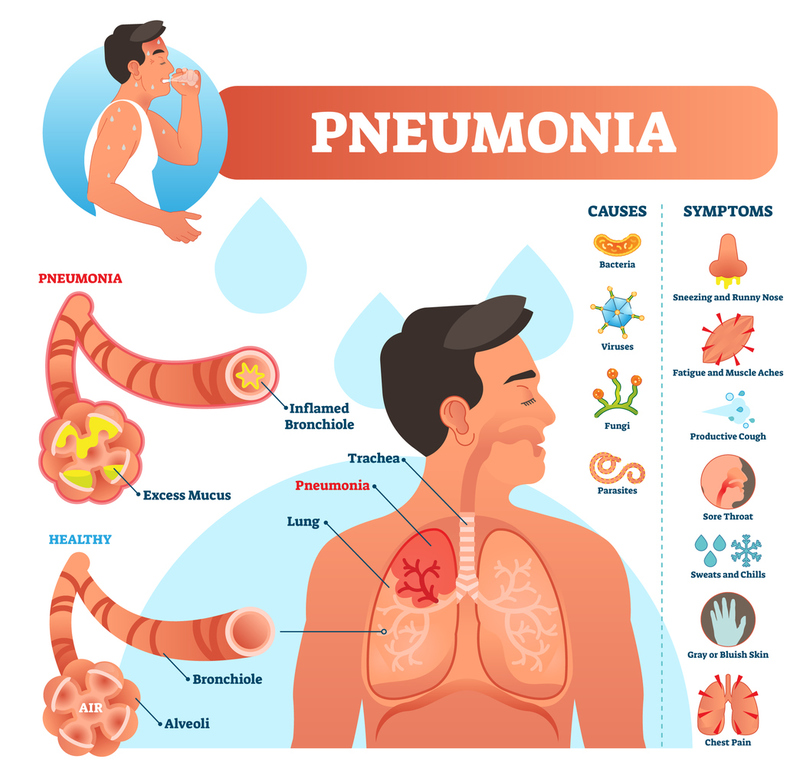

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

[References](https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204)

# **Importing libraries**

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# **Showing some images**

In [2]:
normal1 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
normal2 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
normal3 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL/IM-0119-0001.jpeg')
normal4 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL/IM-0122-0001.jpeg')
pneumonia1 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
pneumonia2 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')
pneumonia3 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg')
pneumonia4 = Image.open('/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg')

normal1 = normal1.resize((200,200))
normal2 = normal2.resize((200,200))
normal3 = normal3.resize((200,200))
normal4 = normal4.resize((200,200))
pneumonia1 = pneumonia1.resize((200,200))
pneumonia2 = pneumonia2.resize((200,200))
pneumonia3 = pneumonia3.resize((200,200))
pneumonia4 = pneumonia4.resize((200,200))

In [3]:
def showImages(img1, img2, img3,img4):
  img = Image.new('RGB',(img1.width + img2.width + img3.width + img4.width, img1.height))
  img.paste(img1,(0,0))
  img.paste(img2,(img1.width,0))
  img.paste(img3,(400,0))
  img.paste(img4,(600,0))
  return img

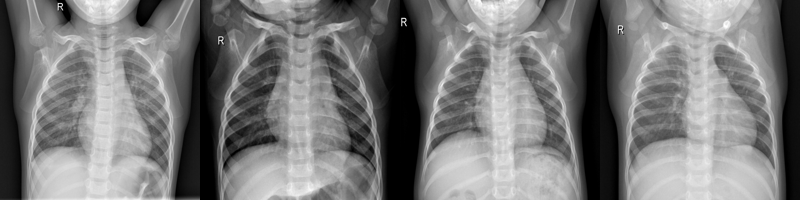

In [4]:
showImages(normal1, normal2, normal3, normal4)

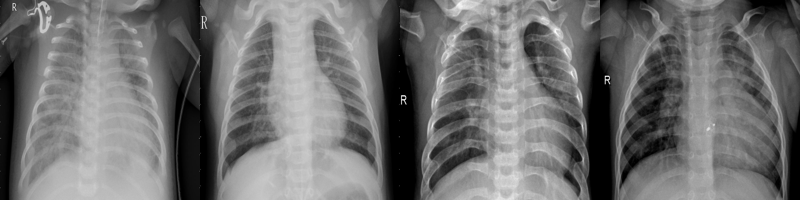

In [5]:
showImages(pneumonia1, pneumonia2, pneumonia3, pneumonia4)

# **Building the Neural Network**

In [8]:
classification = Sequential()
classification.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classification.add(BatchNormalization())
classification.add(MaxPooling2D(pool_size = (2,2)))
classification.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classification.add(BatchNormalization())
classification.add(MaxPooling2D(pool_size = (2,2)))

classification.add(Flatten())

classification.add(Dense(units = 32, activation = 'relu'))
classification.add(Dropout(0.2))
classification.add(Dense(units = 32, activation = 'relu'))
classification.add(Dropout(0.2))
classification.add(Dense(units = 1, activation = 'sigmoid'))

In [33]:
classification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                        

In [9]:
classification.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
train_generator = ImageDataGenerator(rescale = 1./255, 
                                     rotation_range = 7, 
                                     horizontal_flip = True, 
                                     shear_range = 0.2, 
                                     height_shift_range = 0.07, 
                                     zoom_range = 0.2)

test_generator = ImageDataGenerator(rescale = 1./255)

val_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
train_base = train_generator.flow_from_directory('drive/MyDrive/chest_xray/train', target_size = (64, 64),
                                                           batch_size = 32, class_mode = 'binary')

Found 5246 images belonging to 2 classes.


In [12]:
test_base = test_generator.flow_from_directory('drive/MyDrive/chest_xray/test', target_size = (64, 64), 
                                               batch_size = 32, class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [13]:
val_base = val_generator.flow_from_directory('drive/MyDrive/chest_xray/val', target_size = (64, 64), 
                                            batch_size = 32, class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [84]:
history = classification.fit(train_base, steps_per_epoch = len(train_base),
                             epochs = 10, 
                             validation_data = val_base,
                             validation_steps = len(test_base))

Epoch 1/10
164/164 [==============================] - ETA: 0s - loss: 0.3218 - accuracy: 0.8547

164/164 [==============================] - 957s 6s/step - loss: 0.3218 - accuracy: 0.8547 - val_loss: 5.0233 - val_accuracy: 0.5000
Epoch 2/10
164/164 [==============================] - 130s 792ms/step - loss: 0.2441 - accuracy: 0.9083
Epoch 3/10
164/164 [==============================] - 124s 756ms/step - loss: 0.2189 - accuracy: 0.9165
Epoch 4/10
164/164 [==============================] - 126s 767ms/step - loss: 0.2048 - accuracy: 0.9175
Epoch 5/10
164/164 [==============================] - 123s 752ms/step - loss: 0.1907 - accuracy: 0.9289
Epoch 6/10
164/164 [==============================] - 129s 782ms/step - loss: 0.1892 - accuracy: 0.9276
Epoch 7/10
164/164 [==============================] - 125s 762ms/step - loss: 0.1710 - accuracy: 0.9333
Epoch 8/10
164/164 [==============================] - 125s 760ms/step - loss: 0.1656 - accuracy: 0.9377
Epoch 9/10
164/164 [==============================] - 124s 755ms/step - loss: 0.1640 - accuracy: 0.9422
Epoch 10/10
164/164 [===============

# **Analysing the model**

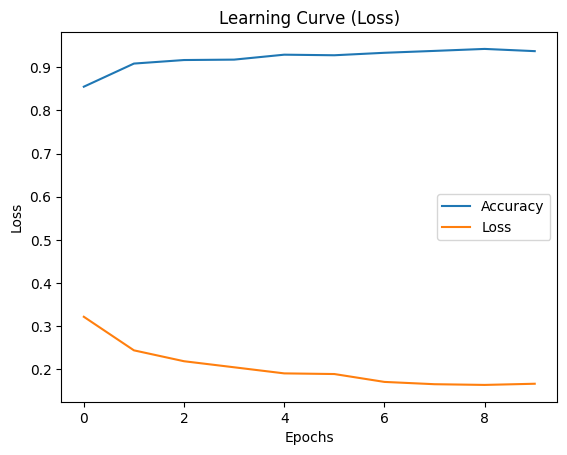

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [86]:
test = classification.evaluate(test_base)

20/20 [==============================] - 62s 3s/step - loss: 0.6110 - accuracy: 0.7853


In [87]:
print("Loss: ", test[0])
print("Accuracy: ", test[1])

Loss:  0.6110491156578064
Accuracy:  0.7852563858032227
